In [586]:
import pandas as pd
import os
import numpy as np
import pyreadr
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

WE IMPORT THE DATA

In [587]:
docs='C:/Users/PC/Downloads' #location of files 

#Test set location and transformation into pandas.dataframe
testAstr='/testA.csv'
testBstr='/testB.csv'
testCstr='/testC.csv'
testA=pd.read_csv(docs+testAstr)
testB=pd.read_csv(docs+testBstr)
testC=pd.read_csv(docs+testCstr)
datasets_test=[testA,testB,testC]

#Train set location and transformation into pandas.dataframe
trainAstr='/trainA.csv'
trainBstr='/trainB.csv'
trainCstr='/trainC.csv'
trainA=pd.read_csv(docs+trainAstr)
trainB=pd.read_csv(docs+trainBstr)
trainC=pd.read_csv(docs+trainCstr)
datasets_train=[trainA,trainB,trainC]

We write some auxiliary functions

In [588]:
#product x * x.T in numpy

def product(line):
    return(np.array([[line[i]*line[j] for i in range(len(line))] for j in range(len(line))]))

#We estimate the paramters of the lda

def parameters_estimation_lda(numpy_data):
    
    #Initialisation of parameters
    
    n=len(numpy_data)
    mu0=np.array([float(0),float(0)])
    mu1=np.array([float(0),float(0)])
    compt_y1=0
    sigma=np.array([[float(0),float(0)],[float(0),float(0)]])
    
    #We estimate pi, mu0, mu1
    
    for i in range(n):
        if numpy_data[i][2]==1:
            compt_y1+=1 
            mu1+=np.array([numpy_data[i][0],numpy_data[i][1]])
        else: 
            mu0+=np.array([numpy_data[i][0],numpy_data[i][1]])        
    pi=compt_y1/n
    mu1=mu1/compt_y1
    mu0=mu0/(n-compt_y1)
    
    #We estimate the matrix sigma
    for i in range(n):
        x_i=np.array([numpy_data[i][0],numpy_data[i][1]])
        if numpy_data[i][2]==1:
            sigma+=product(x_i-mu1)
        else:
            sigma+=product(x_i-mu0)
    sigma=sigma/n
    
    return (pi,mu0,mu1,sigma)
    
    

#Curve of equality p(y=1|x)=0.5

def equality_curve(x1,mu_1,mu_0,sigma_):
    sigma2=np.linalg.inv(sigma_)
    A=(-2*sigma2[1][1]*(mu_1[1]-mu_0[1]))+(mu_0[0]-mu_1[0])*(sigma2[0][1]+sigma2[1][0])
    P_x1_0=((sigma2[0][0])*(((x1-mu_1[0])**2)-((x1-mu_0[0])**2)))
    P_x1_1=(sigma2[0][1]+sigma2[1][0])*(((x1-mu_1[0])*(-mu_1[1]))+(mu_0[1]*(x1-mu_0[0])))
    P_x2_2=sigma2[1][1]*((mu_1[1]**2)-(mu_0[1]**2))
    P_x1=P_x1_0+P_x1_1+P_x2_2
    return(-P_x1/A)

#Impression of values

def impression(pi,mu1,mu0,sigma):
    print('The value of pi is ',pi)
    print('The value of mu1 is ',mu1)
    print('The value of mu0 is ',mu0)
    print('The value of sigma is ',sigma)
    return None

#We count the missclassified data and print the percents.

def missclassified_count(numpy_data,mu1,mu0,sigma):
    compt=0
    n=len(numpy_data)
    for i in range(n):
        x2lim= equality_curve(numpy_data[i][0],mu1,mu0,sigma)
        real_x2=numpy_data[i][1]
        y2=numpy_data[i][2]
        if (real_x2 > x2lim and y2==1) or (real_x2 < x2lim and y2==0):
                compt+=1
    proba=compt/n*100
    print('There is ', compt,' misclassied : that is ',proba,'% of the data')
    return None 
        
#Scatter cloud of the data

def draw_cloud(numpy_data):
    n=len(numpy_data)
    red_colorx,red_colory,blue_colorx,blue_colory=[],[],[],[]
    
    for i in range(n):
        if numpy_data[i][2]==1:
            blue_colorx.append(numpy_data[i][0])
            blue_colory.append(numpy_data[i][1])
        else:
            red_colorx.append(numpy_data[i][0])
            red_colory.append(numpy_data[i][1])
    plt.scatter(blue_colorx,blue_colory,color='blue')
    plt.scatter(red_colorx,red_colory,color='red')
    return red_colorx,red_colory,blue_colorx,blue_colory

#Initialisation of horizontal axis

def horizontal_axis_initialisation(red_colorx,red_colory,blue_colorx,blue_colory):
      
    minimum=min(min(red_colorx),min(blue_colorx))
    diff=max(max(red_colorx),max(blue_colorx))-minimum
    horizontal_axis=[minimum+((k/100)*diff) for k in range(0,102)]
    return horizontal_axis
    
#Plot of LDA

def plot_lda(numpy_data,pi,mu1,mu0,sigma,z):
    
    red_colorx,red_colory,blue_colorx,blue_colory=draw_cloud(numpy_data)
        
    horizontal_axis=horizontal_axis_initialisation(red_colorx,red_colory,blue_colorx,blue_colory)
    vertical_axis=[equality_curve(e,mu1,mu0,sigma) for e in horizontal_axis]
    plt.plot(horizontal_axis,vertical_axis)
    
    #Legend
    plt.legend(['p(y=1|x)=0.5',"y=1","y=0"])
    if z==0:
        plt.title('Training')
    else:
        plt.title('Test')
    plt.show()

Now we can deploy our LDA algorithm

Case A
The value of pi is  0.48
The value of mu1 is  [11.03264581  5.99294053]
The value of mu0 is  [10.73248858 10.93983367]
The value of sigma is  [[0.58821974 0.13912842]
 [0.13912842 0.81959919]]
Training
There is  0  misclassied : that is  0.0 % of the data


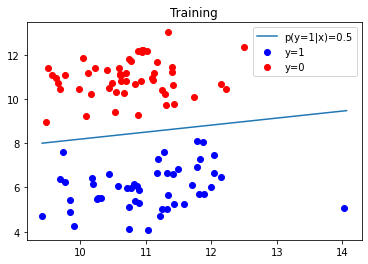

Test
There is  1  misclassied : that is  1.0 % of the data


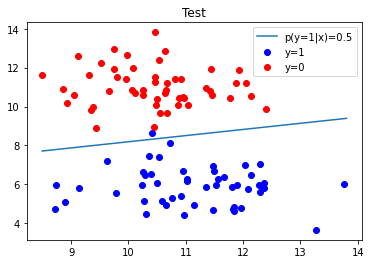

Case B
The value of pi is  0.55
The value of mu1 is  [11.24757662  6.095283  ]
The value of mu0 is  [10.58256756 11.17169818]
The value of sigma is  [[1.64391088 0.70139847]
 [0.70139847 2.0605845 ]]
Training
There is  4  misclassied : that is  2.0 % of the data


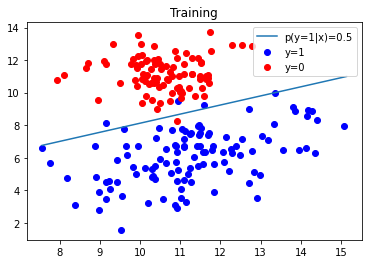

Test
There is  10  misclassied : that is  5.0 % of the data


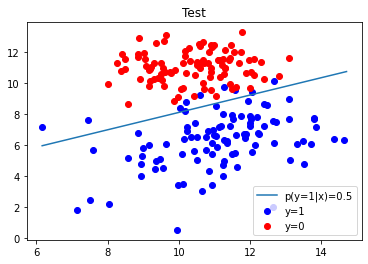

Case C
The value of pi is  0.4166666666666667
The value of mu1 is  [11.18463199  6.04249315]
The value of mu0 is  [10.6192273  10.83868653]
The value of sigma is  [[ 1.27823018 -0.06243809]
 [-0.06243809  1.66584186]]
Training
There is  8  misclassied : that is  2.666666666666667 % of the data


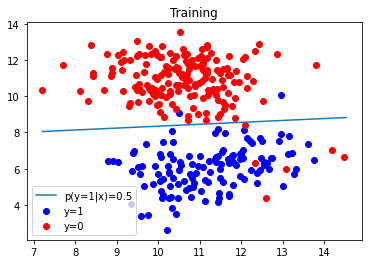

Test
There is  11  misclassied : that is  3.6666666666666665 % of the data


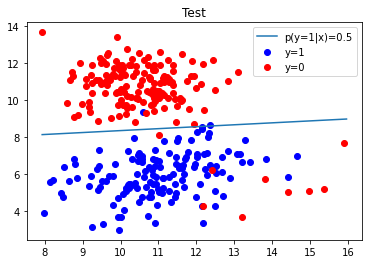

In [589]:
for type_data in range(3):
    
    ###Training on the train set
    
    study=[datasets_train[type_data].to_numpy(),datasets_test[type_data].to_numpy()]
    
    #We print the type a data A,B or C
    
    if type_data==0:
        print("Case A")
    elif type_data==1:
        print("Case B")
    else:
        print("Case C")
    
    #The data is transformes into a numpy array
    
    numpy_data=study[0]
    
    #We estimate the parameters
    
    pi,mu0,mu1,sigma=parameters_estimation_lda(numpy_data)
    
    #We print the values 
    
    impression(pi,mu1,mu0,sigma)
    
    #Plot of results
    
    for z in range(2):
        if z==0:
            print('Training')
        else:
            print("Test")
        
        #Data of study
        
        numpy_data=study[z]
        
        #We compt the missclassified data 
        
        missclassified_count(numpy_data,mu1,mu0,sigma)
        
        #We plot the results
        
        plot_lda(numpy_data,pi,mu1,mu0,sigma,z)

In [590]:
#We plot the equality function

def equality_proba_logistic(x1,b,w):
    return((-b-(w[0]*x1))/w[1])

#We use sklearn module to have a logistic regression function

def logistic_regression(numpy_data):
    n=len(numpy_data)
    x_values=np.array([np.array([numpy_data[i][0],numpy_data[i][1]]) for i in range(n)])
    y_values=np.array([numpy_data[i][2] for i in range(n)])
    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(x_values, y_values)
    b=model.intercept_[0]
    w=model.coef_[0]
    print('The coefficient b is ',b)
    print('The vector w is ',w)
    return b,w

#We study the missclassified data

def missclassified_logistic_linear_regression(numpy_data,b,w,type_regression):
    n=len(numpy_data)
    compt=0
    for i in range(n):
        if type_regression=='logistic':
            x2lim= equality_proba_logistic(numpy_data[i][0],b,w)
        else:
            x2lim= equality_proba_linear(numpy_data[i][0],b,w)
        real_x2=numpy_data[i][1]
        y2=numpy_data[i][2]
        if (real_x2 > x2lim and y2==1) or (real_x2 < x2lim and y2==0):
            compt+=1
    proba=compt/n*100
    print('There is ', compt,' misclassied : that is ',proba,'% of the data')

#We plot the logistic and linear regression equality curve 

def plot_logistic_linear_regression(numpy_data,b,w,type_regression):
    
    red_colorx,red_colory,blue_colorx,blue_colory=draw_cloud(numpy_data)
    
    horizontal_axis=horizontal_axis_initialisation(red_colorx,red_colory,blue_colorx,blue_colory)
    
    if type_regression=='logistic':
        vertical_axis=[equality_proba_logistic(e,b,w) for e in horizontal_axis]
    else:
        vertical_axis=[equality_proba_linear(e,b,w) for e in horizontal_axis]
        
    plt.plot(horizontal_axis,vertical_axis)
    
    #Legend
    plt.legend(['p(y=1|x)=0.5',"y=1","y=0"])
    if z==0:
        plt.title('Training')
    else:
        plt.title('Test')
    plt.show()

Case A
The coefficient b is  0.2233446506984402
The vector w is  [ 1.49194018 -1.95057158]
Training
There is  1  misclassied : that is  1.0 % of the data


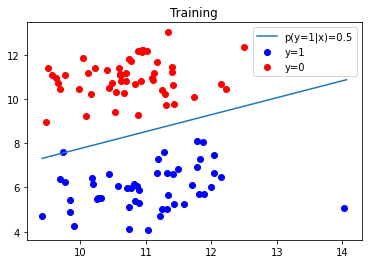

Test
There is  1  misclassied : that is  1.0 % of the data


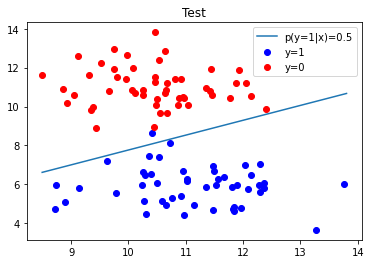

Case B
The coefficient b is  0.5882251023040442
The vector w is  [ 1.65319609 -2.08420052]
Training
There is  4  misclassied : that is  2.0 % of the data


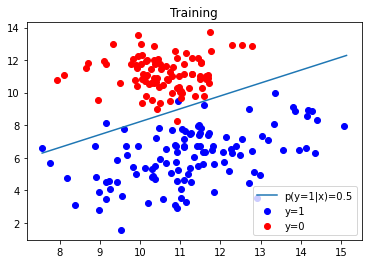

Test
There is  8  misclassied : that is  4.0 % of the data


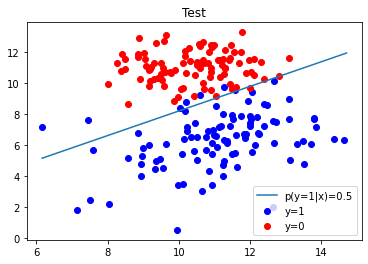

Case C
The coefficient b is  1.617384485781654
The vector w is  [ 0.8380567  -1.34338786]
Training
There is  10  misclassied : that is  3.3333333333333335 % of the data


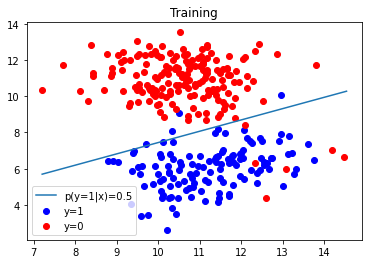

Test
There is  12  misclassied : that is  4.0 % of the data


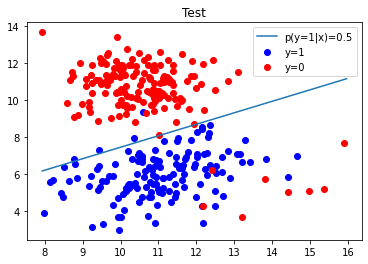

In [591]:
for type_data in range(3):
    ###Training on the train set
    study=[datasets_train[type_data].to_numpy(),datasets_test[type_data].to_numpy()]
    
    #We print the type a data A,B or C
    
    if type_data==0:
        print("Case A")
    elif type_data==1:
        print("Case B")
    else:
        print("Case C")
    
    #The data is transformes into a numpy array
    
    numpy_data=study[0]
    
    #We estimate the parameters with logistic regression
    
    b,w=logistic_regression(numpy_data)
    
    for z in range(2):
        if z==0:
            print('Training')
        else:
            print("Test")
            
        #Data 
        
        numpy_data=study[z]
        
        #We evaluate the missclassified data
        
        missclassified_logistic_linear_regression(numpy_data,b,w,'logistic')
        
        #We plot the results
        
        plot_logistic_linear_regression(numpy_data,b,w,'logistic')
    
    

QUESTION 3 PAGE 6-7-8

In [592]:
#Equality curve p(y=1|x)=0.5

def equality_proba_linear(x1,b,w):
    return((0.5-b-(w[0]*x1))/w[1])

#Estimation of parameters

def linear_parameters_estimation(numpy_data):
    
    #Estimation of matrix M
    
    sum_xi1,sum_xi2,sum_yi,sum_xi1xi2,sum_square_xi1,sum_square_xi2=float(0),float(0),float(0),float(0),float(0),float(0)
    n=len(numpy_data)
    for i in range(n):
        sum_xi1+=float(numpy_data[i][0])
        sum_xi2+=float(numpy_data[i][1])
        sum_yi+=float(numpy_data[i][2])
        sum_xi1xi2+=float(numpy_data[i][0]*numpy_data[i][1])
        sum_square_xi1+=float((numpy_data[i][0]**2))
        sum_square_xi2+=float((numpy_data[i][1]**2))
    M=np.array([[sum_square_xi1,sum_xi1xi2,sum_xi1],[sum_square_xi2,sum_xi1xi2,sum_xi2],[sum_xi1,sum_xi2,n]])
    
    #Estimation of matrix C
    
    sum_xi1yi, sum_xi2yi, sum_yib=float(0), float(0),float(0)
    for i in range(n):
        sum_xi1yi+=float(numpy_data[i][0]*numpy_data[i][2])
        sum_xi2yi+=float(numpy_data[i][1]*numpy_data[i][2])
        sum_yib+=float(numpy_data[i][2])
    C=np.array([[sum_xi1yi],[sum_xi2yi],[sum_yib]])
    
    #Matrix of coefficients P
    
    P=np.dot(np.linalg.inv(M),C)
    b=P[2][0]
    w=np.array([P[0][0],P[1][0]])
    print('The coefficient b is ',b)
    print('The vector w is ',w)
    return b,w 



Case A
The coefficient b is  -1.1514285516679479
The vector w is  [0.1315529  0.02341826]
Training
There is  36  misclassied : that is  36.0 % of the data


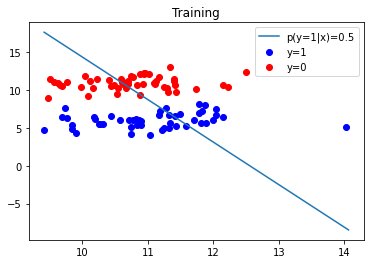

Test
There is  50  misclassied : that is  50.0 % of the data


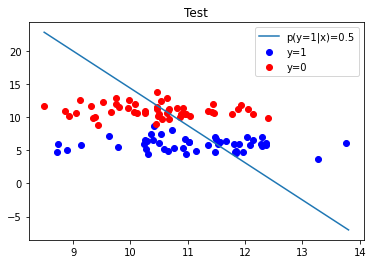

Case B
The coefficient b is  -0.46505311282857775
The vector w is  [ 0.09376561 -0.00137512]
Training
There is  77  misclassied : that is  38.5 % of the data


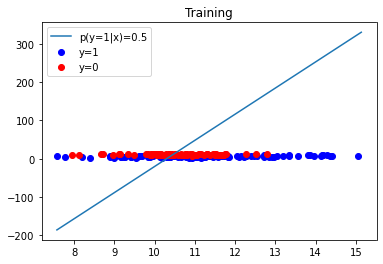

Test
There is  83  misclassied : that is  41.5 % of the data


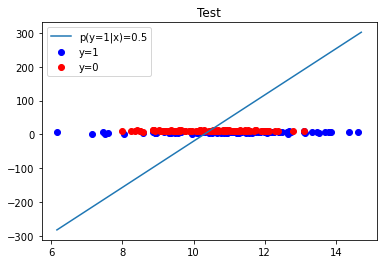

Case C
The coefficient b is  -0.5608153239088836
The vector w is  [ 0.09688509 -0.00839199]
Training
There is  93  misclassied : that is  31.0 % of the data


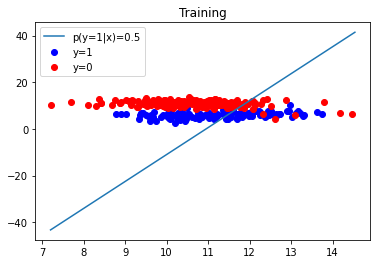

Test
There is  111  misclassied : that is  37.0 % of the data


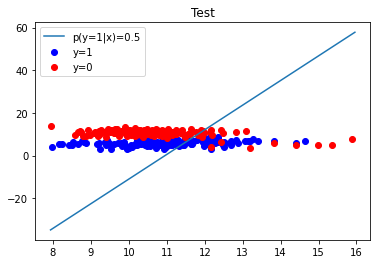

In [593]:
for type_data in range(3):
    ###Training on the train set
    study=[datasets_train[type_data].to_numpy(),datasets_test[type_data].to_numpy()]
    
    #We print the type a data A,B or C
    if type_data==0:
        print("Case A")
    elif type_data==1:
        print("Case B")
    else:
        print("Case C")
    
    #The data is transformes into a numpy array
    
    numpy_data=study[0]
    
    #Estimation of parameters
    
    b,w=linear_parameters_estimation(numpy_data)
    
    for z in range(2):
        if z==0:
            print('Training')
        else:
            print("Test")
            
        #Data 
        
        numpy_data=study[z]
        
        #We evaluate the missclassified data
        
        missclassified_logistic_linear_regression(numpy_data,b,w,'linear')
        
        #We plot the results
        
        plot_logistic_linear_regression(numpy_data,b,w,'linear')
    
    
    

QUESTION 4 

The linear regression has the least interesting results ( it is not adapted with a classification task)
Both Generative model and Logistic model have better results.
That can append because:
-low value of x2 and sensibility
-linearity models has not enough parameters
-in the cases A and B we see a clear separation of the data, not for case C: results depends on the type of data 
-GDA is best because it has more parameters variables than logistic regression

SECOND PART

QUESTION 1 PAGE 9-10-11-12-13-14

QUESTION 2

We need to normalise the data.
Then,we need to use a sclaling factor otherwise the factor in the exponential term is too negative and we have a log_likelihood of -np.inf

In [594]:
#Some Parameters

n_iter_max=10 #maximal number of iterations
scaling_factors=[0.005,0.001,0.005,0.0001] #used to soften the exponential term 

#log_likelihood function

def exponentation(X_i,mu_k,sigma_k,pi_k):
    p=len(X_i)
    diff=X_i-mu_k
    exp_term=np.dot(diff.T,np.dot(np.linalg.inv(sigma_k),diff))
    value= pi_k*(np.linalg.det(sigma_k)**(-0.5))*((2*np.pi)**(-p/2))*np.exp(-(0.5*exp_term))
    return value
    
def log_likehood(X,mu, sigma, pi):
    log_likelihood=0
    n=len(X)
    p=len(X[0])
    k=len(pi)
    for i in range(n):
        log_xi=0
        for iter_cluster in range(k):
            log_xi+= exponentation(X[i],mu[iter_cluster],sigma[iter_cluster],pi[iter_cluster])
        log_likelihood+=np.log(log_xi)
    return log_likelihood

#Phase of expectation 

def expectation_step(X,mu,sigma,pi,k):
    z = np.zeros((len(X), k))
    for i in range(len(X)):
        for iter_cluster in range(k):
            z[i, iter_cluster] = exponentation(X[i],mu[iter_cluster],sigma[iter_cluster],pi[iter_cluster])
    
        z[i] /= np.sum(z[i])
    return z

#Phase of maximisation

def maximisation_step(z,X,mu,sigma,pi,k,n):
    
    nk = np.sum(z, axis=0)
    pi = nk / n
    mu = np.dot(z.T, X) / nk[:, np.newaxis]
    
    for j in range(k):
        x = X - mu[j]
        sigma[j] = np.dot(x.T * z[:, j], x) / nk[j]
    
    return pi,mu,sigma
        
        
    


In [595]:

def EM_algo(dataset,k,eps,scaling_factor):
    
    # Définir les données d'entrée
    
    dataset_numpy=dataset.to_numpy()
    
    #Dimensions of data 
    
    n=len(dataset_numpy)
    p=len(dataset_numpy[0])
    
    #Average and standard deviation for each columns
    
    average_numpy=np.average(dataset_numpy,axis=0)
    standard_deviation=np.std(dataset_numpy,axis=0)

    #Corrected data
    
    X_temp=np.array([[((dataset_numpy[i][l]-average_numpy[l])/standard_deviation[l]) for l in range(len(dataset_numpy[0]))] for i in range(n)])
    
    #Scaling factor for calculus
    
    X=scaling_factor*X_temp
    
    # Initialisation of parameters
    
    mu = np.array([np.min(X,axis=0),np.average(X,axis=0),np.max(X,axis=0)])
    sigma = np.array([np.identity(p) for n_cluster in range(k)]) 
    pi = np.ones(k) / k 
    
    #log_likelihood conditions
    
    log_like_before_step=-np.inf
    log_like_after_step=log_likehood(X,mu,sigma, pi)
    log_likelihood_list=[log_like_after_step]
    n_iter=0
    
    #Condition of stop
    
    while (log_like_after_step-log_like_before_step > eps) and (n_iter_max > n_iter):     
        n_iter+=1
    
        # Expectation step
        z=expectation_step(X,mu,sigma,pi,k)
            
        # Maximisation step
        pi,mu,sigma=maximisation_step(z,X,mu,sigma,pi,k,n)
        
        #Actualisation of the log_likelihood
        
        log_like_before_step, log_like_after_step=log_like_after_step, log_likehood(X,mu, sigma, pi)
        log_likelihood_list.append(log_like_after_step)
        #print(n_iter,log_like_after_step)
        
    for l in range(k):
        print('For the cluster number ',str(l+1),' ,the parameters are  :')
        print('pi = ',pi[l])
        print('mu = ',(np.array([mu[l][j]*standard_deviation[j]/scaling_factor+average_numpy[j] for j in range(p)])))
        print('sigma =', sigma[l])
    
    #We plot the evolutions of the log_likelihood
    
    horizontal_axis=[i for i in range(n_iter+1)]
    vertical_axis=log_likelihood_list
    plt.plot(horizontal_axis,vertical_axis)
    plt.xlabel('Number of iterations')
    plt.ylabel('Log likelihood')
    plt.show()
        
    return('Done')

QUESTION 3

In [596]:
decathlon_file='/decathlon_data.csv'
decathlon_dataframe=pd.read_csv(docs+decathlon_file)


In [597]:
dataset=decathlon_dataframe
del dataset['Name']

With the scaling factor  0.005 , we have the following results:
For the cluster number  1  ,the parameters are  :
pi =  0.3847525703152438
mu =  [ 10.95852332   7.22590419  14.47378468   1.99200371  49.34538086
  14.47482337  43.35213568   4.62610963  58.42959899 275.00265268]
sigma = [[ 2.08163148e-05 -1.28570669e-05 -1.22765857e-05 -6.36527571e-06
   9.12008752e-06  7.80300775e-06 -1.21304955e-05  2.14610530e-06
   4.03498926e-06 -2.26842534e-06]
 [-1.28570669e-05  2.50382886e-05  7.41930895e-07  5.42138709e-06
  -1.69902921e-05 -5.51863239e-06  5.02525146e-06  2.11052280e-06
  -1.38922295e-05  5.71539293e-07]
 [-1.22765857e-05  7.41930895e-07  2.83065671e-05  4.47013661e-06
  -4.99087605e-06 -7.87855216e-06  1.69394310e-05 -1.12246550e-07
   6.68638907e-06  2.03300607e-06]
 [-6.36527571e-06  5.42138709e-06  4.47013661e-06  2.17350913e-05
   2.00638835e-06 -4.13126814e-06  8.75605595e-06  1.98494099e-06
  -4.17652406e-06  7.21293529e-06]
 [ 9.12008752e-06 -1.69902921e-05 -4.99087605e

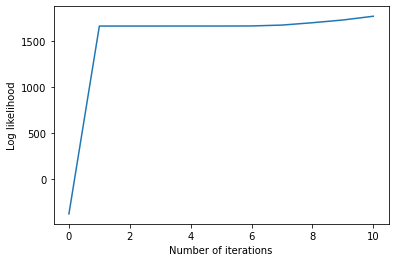

With the scaling factor  0.001 , we have the following results:
For the cluster number  1  ,the parameters are  :
pi =  0.3624562955802534
mu =  [ 10.98366069   7.23618632  14.43554517   1.9770953   49.49552567
  14.54313225  43.76116166   4.71263393  58.65751186 276.96564275]
sigma = [[ 7.73190353e-07 -4.43478007e-07 -4.02033596e-07 -1.87706304e-07
   4.38835467e-07  4.88968939e-07 -3.62780430e-07 -2.57652259e-08
   7.65561233e-08  1.71628866e-08]
 [-4.43478007e-07  9.19379213e-07  1.01187911e-07  2.37496694e-07
  -5.77951904e-07 -3.11974510e-07  2.22804563e-07  2.27372446e-07
  -2.74327258e-07  1.79131954e-08]
 [-4.02033596e-07  1.01187911e-07  1.11362827e-06  4.56401319e-07
  -2.07189242e-07 -3.38702086e-07  6.84690448e-07 -4.08728950e-08
   3.44152294e-07  4.74045491e-08]
 [-1.87706304e-07  2.37496694e-07  4.56401319e-07  1.02422255e-06
  -4.14704268e-08 -1.87977290e-07  3.70941900e-07 -6.97835812e-08
   1.11839509e-10  9.75795343e-08]
 [ 4.38835467e-07 -5.77951904e-07 -2.07189242e

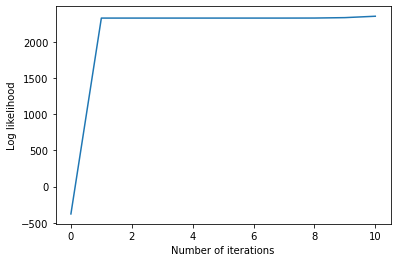

With the scaling factor  0.005 , we have the following results:
For the cluster number  1  ,the parameters are  :
pi =  0.3847525703152438
mu =  [ 10.95852332   7.22590419  14.47378468   1.99200371  49.34538086
  14.47482337  43.35213568   4.62610963  58.42959899 275.00265268]
sigma = [[ 2.08163148e-05 -1.28570669e-05 -1.22765857e-05 -6.36527571e-06
   9.12008752e-06  7.80300775e-06 -1.21304955e-05  2.14610530e-06
   4.03498926e-06 -2.26842534e-06]
 [-1.28570669e-05  2.50382886e-05  7.41930895e-07  5.42138709e-06
  -1.69902921e-05 -5.51863239e-06  5.02525146e-06  2.11052280e-06
  -1.38922295e-05  5.71539293e-07]
 [-1.22765857e-05  7.41930895e-07  2.83065671e-05  4.47013661e-06
  -4.99087605e-06 -7.87855216e-06  1.69394310e-05 -1.12246550e-07
   6.68638907e-06  2.03300607e-06]
 [-6.36527571e-06  5.42138709e-06  4.47013661e-06  2.17350913e-05
   2.00638835e-06 -4.13126814e-06  8.75605595e-06  1.98494099e-06
  -4.17652406e-06  7.21293529e-06]
 [ 9.12008752e-06 -1.69902921e-05 -4.99087605e

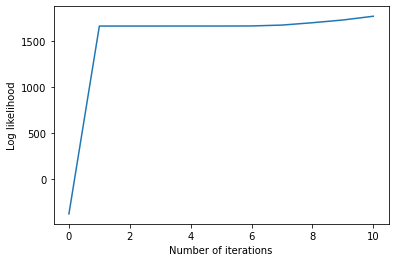

With the scaling factor  0.0001 , we have the following results:
For the cluster number  1  ,the parameters are  :
pi =  0.3333376444360454
mu =  [ 10.99735321   7.26009856  14.47637782   1.97685258  49.61397637
  14.60464562  44.31526786   4.76167319  58.32702788 279.00636743]
sigma = [[ 9.92536465e-09 -5.93850135e-09 -3.57513784e-09 -2.44964089e-09
   5.18880535e-09  5.77923673e-09 -2.25557223e-09 -8.28492075e-10
  -1.52250445e-09 -5.59972813e-10]
 [-5.93850135e-09  9.97992485e-09  1.82644020e-09  2.93723661e-09
  -6.01307848e-09 -5.02076488e-09  1.96114963e-09  2.05532177e-09
   1.12885208e-09 -3.42236755e-10]
 [-3.57513784e-09  1.82644020e-09  1.00249058e-08  4.89373872e-09
  -1.39672197e-09 -2.53096339e-09  6.17203628e-09  5.98553518e-10
   3.75217647e-09  1.14876549e-09]
 [-2.44964089e-09  2.93723661e-09  4.89373872e-09  1.00136239e-08
  -1.86016638e-09 -2.82000638e-09  3.69773042e-09 -1.55071483e-09
   1.69387161e-09 -4.33049674e-10]
 [ 5.18880535e-09 -6.01307848e-09 -1.39672197

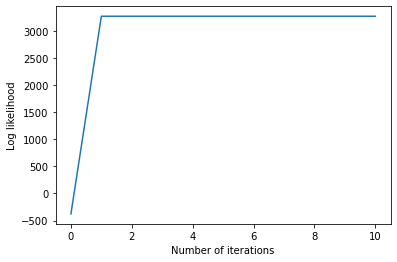

In [598]:
for scaling_factor in scaling_factors:
    print('With the scaling factor ', scaling_factor,', we have the following results:')
    EM_algo(dataset,3,-np.inf,scaling_factor)